# Subplot

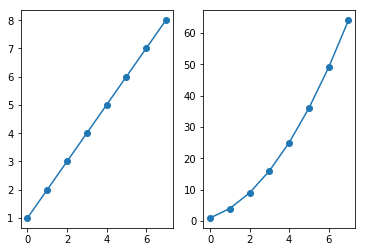

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.subplot(1, 2, 1)
linear_data = np.array([1, 2, 3, 4, 5, 6, 7, 8])
exponential_data = linear_data ** 2
plt.plot(linear_data, '-o')
#plt.plot(exponential_data, '-x')

plt.subplot(1, 2, 2)

plt.plot(exponential_data, '-o')
plt.show()

### Problem: the linear and exponential graphs looks kinda the same, due to different y-axis ranges

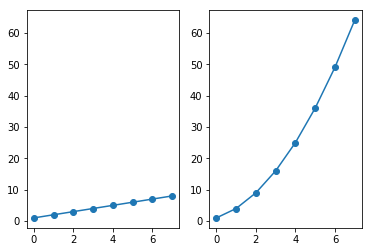

In [6]:
# fix, with locked y-axis
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-o')


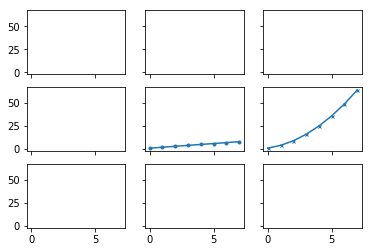

In [18]:
# multiple subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharey=True, sharex=True)
ax5.plot(linear_data, '-o', markersize=3)
ax6.plot(exponential_data, '-x', markersize=3)

# make all the y-axes of the subplots show
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

plt.gcf().canvas.draw()

# Histograms

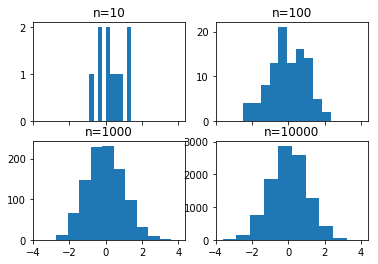

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(len(axs)):
    sample_size=  10 ** (n + 1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

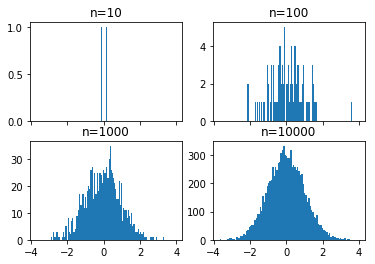

In [20]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(len(axs)):
    sample_size = 10 ** (n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

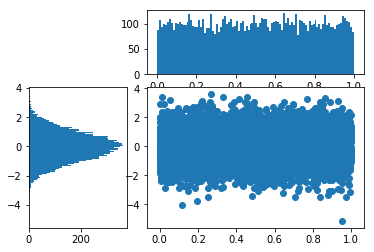

In [22]:
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1: , 0])
lower_right = plt.subplot(gspec[1:, 1:])

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

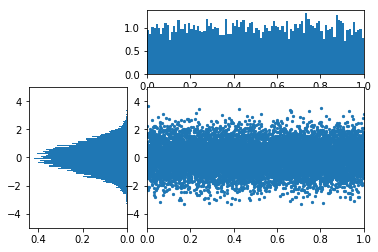

In [29]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1: , 0])
lower_right = plt.subplot(gspec[1:, 1:])

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y,s=5)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')


top_histogram.clear()
top_histogram.hist(X, bins=100, density=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', density=True)

side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

# Box plots

In [30]:
import pandas as pd

normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample,
                'random': random_sample,
                'gamma': gamma_sample})
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,0.010264,0.501373,2.001781
std,1.003910,0.287436,1.422817
min,-4.054750,0.000050,0.016121
25%,-0.652243,0.253222,0.959895
50%,0.011168,0.498600,1.662133
75%,0.683352,0.749553,2.685350
max,3.477761,0.999933,11.178990


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd5ef9bf950>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd5ef9e2ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd5ef9d3bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd5ef9e9990>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd5ef9e9e50>],
 'means': []}

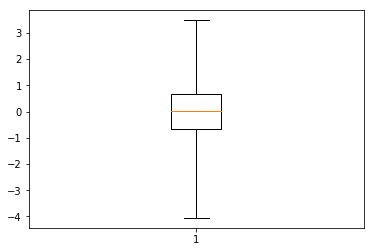

In [31]:
plt.figure()
plt.boxplot(df['normal'], whis='range')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd5efa1ea50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd5efa49b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd5efa41b90>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd5efa49e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd5efa51a90>,
 'means': []}

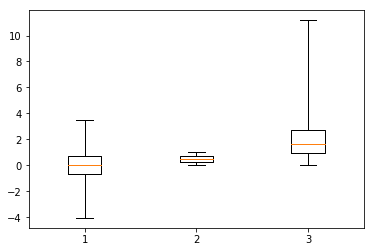

In [32]:
plt.clf()
plt.boxplot([df['normal'], df['random'], df['gamma']], whis='range')

(array([ 64., 163., 249., 311., 358., 371., 383., 401., 420., 437., 417.,
        392., 382., 384., 347., 307., 328., 308., 273., 285., 245., 229.,
        231., 227., 169., 182., 195., 157., 145., 135., 114., 115., 109.,
        105.,  72.,  76.,  66.,  83.,  66.,  58.,  52.,  50.,  57.,  37.,
         39.,  38.,  29.,  25.,  29.,  33.,  23.,  19.,  17.,  15.,  13.,
         19.,  10.,  14.,  10.,  17.,  10.,   7.,  11.,   3.,   9.,   3.,
          8.,   5.,   4.,   4.,   1.,   2.,   4.,   0.,   3.,   0.,   0.,
          1.,   2.,   3.,   2.,   1.,   1.,   1.,   0.,   0.,   2.,   0.,
          4.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          2.]),
 array([ 0.01612123,  0.12774992,  0.23937861,  0.35100729,  0.46263598,
         0.57426466,  0.68589335,  0.79752203,  0.90915072,  1.0207794 ,
         1.13240809,  1.24403677,  1.35566546,  1.46729414,  1.57892283,
         1.69055151,  1.8021802 ,  1.91380888,  2.02543757,  2.13706625,
         2.24869494,  2.36

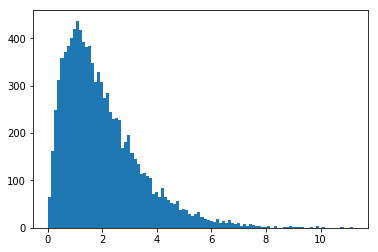

In [33]:
plt.figure()
plt.hist(df['gamma'], bins=100)

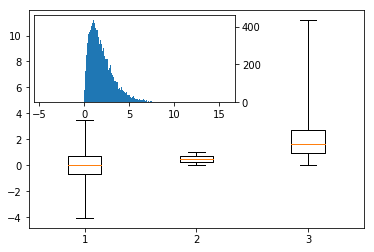

In [37]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_i1

plt.figure()
plt.boxplot([df['normal'], df['random'], df['gamma']], whis='range')
ax2 = mpl_i1.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)
ax2.yaxis.tick_right()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd5ef226510>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd5ef226e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd5ef2265d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd5ef21ffd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd5ef21fd50>,
 'means': []}

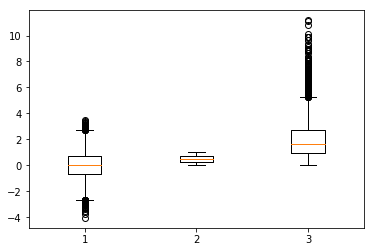

In [38]:
plt.figure()
plt.boxplot([df['normal'], df['random'], df['gamma']])

# Heatmaps

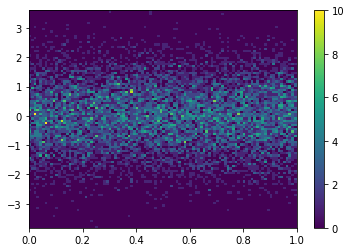

In [41]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.hist2d(X, Y, bins=100)
plt.colorbar()

# Animation

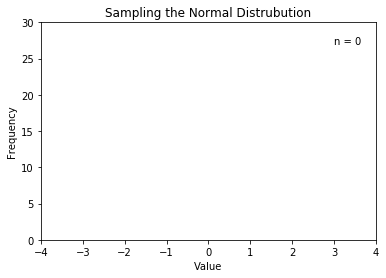

In [46]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

def update(curr):
    if curr == n:
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4, 4, 0, 30])
    plt.gca().set_title('Sampling the Normal Distrubution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3, 27])
    
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

# Interactivity

4

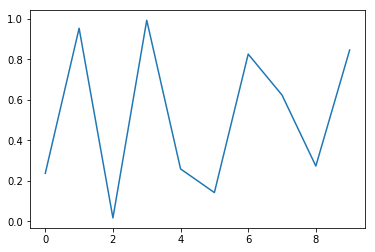

In [51]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{}, {}and data {},{}'.format(event.x, 
                                                                         event.y,
                                                                        '\n',
                                                                        event.xdata,
                                                                        event.ydata))
plt.gcf().canvas.mpl_connect('botton_press_event', onclick)

In [53]:
from random import shuffle

origins = ['China', 'Brazil', 'India', 'USA', 'Canada',
          'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']
shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                  'weight': np.random.rand(10),
                  'origin': origins})
df

,height,weight,origin
0,0.759270,0.724502,Germany
1,0.081259,0.906521,China
2,0.863268,0.908449,India
3,0.931517,0.891054,USA
4,0.374257,0.606463,Canada
5,0.601048,0.874182,Mexico
6,0.830737,0.655343,Iraq
7,0.937882,0.122589,UK
8,0.939526,0.163341,Chile
9,0.260357,0.792686,Brazil


Text(0.5, 0, 'Height')

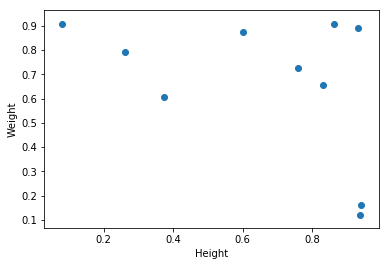

In [58]:
plt.figure()
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

4

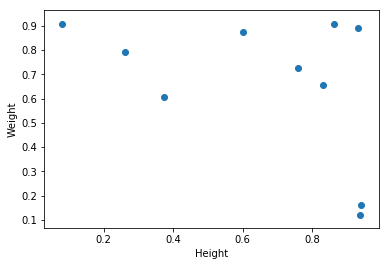

In [59]:
plt.figure()
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')


def onpick(event):
    orgin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selectd item came from {}'.format(origin))

plt.gcf().canvas.mpl_connect('pick_event', onpick)